# Predicting Home Loans' Repayment and Analysis of Unbanked Population

The unbanked population, consumers without adequate credit history, will go to an untrustworthy lender who could take unfair advantage of their situation because reputable banks will not provide them with loans. The subprime loans have caused enough damage to our economic system, so our task is to help identify worthy candidates 


However, there could be other ways to determine the credit worthiness of applicants. The vision of Home Credit Group is to provide fair and equal services to a non-traditional home loan applicant. 


1) Determine if the applicant will likely repay their loan by using previous credit information via the Home Credit Group's databases and the Credit Bureau

2) Find non-traditional methods to determine the credit worthiness of an applicant

In [1]:
import pandas as pd
import numpy as np
import pickle

#Allows to see up to 500 columns within notebook
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

# Load datasets into dataframes

In [2]:
df_application_train = pd.read_csv('application_train.csv',header=0,error_bad_lines=False,nrows=10000)
df_previous_application = pd.read_csv('previous_application.csv',header=0,error_bad_lines=False)
df_installment_payments = pd.read_csv('installments_payments.csv',header=0,error_bad_lines=False)
df_bureau = pd.read_csv('bureau.csv',header=0,error_bad_lines=False)

df_bureau_bal = pd.read_csv('bureau_balance.csv',header=0,error_bad_lines=False)
df_pos_cash_bal = pd.read_csv('POS_CASH_balance.csv',header=0,error_bad_lines=False)
df_credit_card_bal = pd.read_csv('credit_card_balance.csv',header=0,error_bad_lines=False)

#dflist = [df_application_train,df_previous_application,df_installment_payments,df_bureau,df_bureau_bal,df_pos_cash_bal,df_credit_card_bal]


In [3]:
#Drop Data for Application IDs not included within application train dataset

df_previous_application['TARGET APPS'] = df_previous_application.SK_ID_CURR.isin(df_application_train.SK_ID_CURR)
df_installment_payments['TARGET APPS'] = df_installment_payments.SK_ID_CURR.isin(df_application_train.SK_ID_CURR)
df_bureau['TARGET APPS'] = df_bureau.SK_ID_CURR.isin(df_application_train.SK_ID_CURR)
df_bureau_bal['TARGET APPS'] = df_bureau_bal.SK_ID_BUREAU.isin(df_bureau[df_bureau['TARGET APPS']==True].SK_ID_BUREAU)
df_pos_cash_bal['TARGET APPS'] = df_pos_cash_bal.SK_ID_CURR.isin(df_application_train.SK_ID_CURR)
df_credit_card_bal['TARGET APPS'] = df_credit_card_bal.SK_ID_CURR.isin(df_application_train.SK_ID_CURR)


df_previous_application_new = df_previous_application[df_previous_application['TARGET APPS']==True]
df_installment_payments_new = df_installment_payments[df_installment_payments['TARGET APPS']==True]
df_bureau_new = df_bureau[df_bureau['TARGET APPS']==True]
df_bureau_bal_new = df_bureau_bal[df_bureau_bal['TARGET APPS']==True]
df_pos_cash_new = df_pos_cash_bal[df_pos_cash_bal['TARGET APPS']==True]
df_credit_card_bal_new = df_credit_card_bal[df_credit_card_bal['TARGET APPS']==True]


# Example of a dataset: Previous Application Dataset

Started with Previous Application Dataset because it had historical information about the applicant and the mortgage lender's previous decision, so I believe it is extremely important. 

In [4]:
df_previous_application_new.fillna(0.0).describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,4.615400e+04,46154.000000,46154.000000,4.615400e+04,4.615400e+04,4.615400e+04,4.615400e+04,46154.000000,46154.000000,46154.000000,46154.000000,46154.000000,46154.000000,46154.000000,46154.000000,46154.000000,46154.000000,46154.000000,46154.00000,46154.000000,46154.000000
mean,1.920003e+06,105803.091021,12444.385732,1.786086e+05,2.000452e+05,3.044580e+03,1.786066e+05,12.497248,0.996122,0.036636,0.000695,0.002840,-872.064350,299.883694,12.661849,204993.334381,8523.248646,19795.505092,46737.00351,49706.345821,0.194761
std,5.328249e+05,3381.625708,14806.102432,3.035630e+05,3.299470e+05,1.553782e+04,3.035484e+05,3.321851,0.062156,0.083222,0.012672,0.047228,780.015424,1673.321524,14.704380,181287.869007,57207.077359,83491.262903,122710.26081,125894.911684,0.396021
min,1.000213e+06,100002.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-2922.000000,-1.000000,0.000000,-2922.000000,-2891.000000,-2796.000000,-2854.00000,-2793.000000,0.000000
25%,1.459265e+06,102826.000000,2250.000000,1.892138e+04,2.429550e+04,0.000000e+00,1.895512e+04,10.000000,1.000000,0.000000,0.000000,0.000000,-1297.000000,-1.000000,0.000000,0.000000,-1027.000000,-577.000000,-728.75000,-689.750000,0.000000
50%,1.918783e+06,105838.000000,8183.835000,7.078221e+04,8.086500e+04,0.000000e+00,7.081200e+04,12.000000,1.000000,0.000000,0.000000,0.000000,-573.000000,3.000000,10.000000,365243.000000,-272.000000,0.000000,0.00000,0.000000,0.000000
75%,2.380332e+06,108750.750000,16875.000000,1.800788e+05,2.170395e+05,0.000000e+00,1.800788e+05,15.000000,1.000000,0.000000,0.000000,0.000000,-269.000000,80.000000,18.000000,365243.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,2.845378e+06,111633.000000,215427.060000,4.185000e+06,3.749054e+06,1.350000e+06,4.185000e+06,23.000000,1.000000,0.816466,0.744985,0.867336,-2.000000,74625.000000,84.000000,365243.000000,365243.000000,365243.000000,365243.00000,365243.000000,1.000000


# Functions to Aggregate Data and Merging

In [5]:

# Function to calculate missing values by columns

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1]>0].shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
    
# Function to create dictionary for Pivot Table's aggfunc parameter based on dtype of the column    
def aggfuncdic(df):
    dictionary = {}

    for i in df.columns:
        if df[i].dtype == 'object':
            dictionary[i] = lambda x: len(x.unique())
        else:
            dictionary[i] = [min,max,np.mean,sum]
    return dictionary

#Function to flatten multilevel pivot table for easier merging with train dataset
def flatten_multilevel_col(df):
    new_cols = [''.join(t) for t in df.columns]
    df.columns = new_cols
    return df

# Merging Supporting Datasets with Training Dataset

Previous application dataset has all of the previous application available. Currently, it has a 1:many relationship to the application dataset, so I will need to aggregate the columns before merging. Below is where I aggreagated the previous_application dataset by using index 'SK_ID_CURR'. The purpose of this is so I can provide a 1:1 relationship to the train/test dataset, while limit the columns created.

In [6]:
#Remove any columns with greater than 80% of missing values (arbitrary threshold)
#Previous Application Dataset
missing_values = missing_values_table(df_previous_application_new)
nonmissingvallist = missing_values[missing_values.iloc[:,1]<50].index.tolist()
df_previous_application_new = df_previous_application_new[nonmissingvallist]


#Bureau Dataset
missing_values = missing_values_table(df_bureau_new)
nonmissingvallist = missing_values[missing_values.iloc[:,1]<50].index.tolist()
df_bureau_new = df_bureau_new[nonmissingvallist]

#Installment Payments Dataset
missing_values = missing_values_table(df_installment_payments_new)
nonmissingvallist = missing_values[missing_values.iloc[:,1]<50].index.tolist()
df_installment_payments_new = df_installment_payments_new[nonmissingvallist]

#Bureau Balance Dataset
missing_values = missing_values_table(df_bureau_bal_new)
nonmissingvallist = missing_values[missing_values.iloc[:,1]<50].index.tolist()
df_bureau_bal_new = df_bureau_bal_new[nonmissingvallist]

#POS Cash Dataset
missing_values = missing_values_table(df_pos_cash_new)
nonmissingvallist = missing_values[missing_values.iloc[:,1]<50].index.tolist()
df_pos_cash_new = df_pos_cash_new[nonmissingvallist]

#Credit Card Balance Dataset
missing_values = missing_values_table(df_credit_card_bal_new)
nonmissingvallist = missing_values[missing_values.iloc[:,1]<50].index.tolist()
df_credit_card_bal_new = df_credit_card_bal_new[nonmissingvallist]

Your selected dataframe has 38 columns.
There are 14 columns that have missing values.
Your selected dataframe has 18 columns.
There are 6 columns that have missing values.
Your selected dataframe has 9 columns.
There are 0 columns that have missing values.
Your selected dataframe has 4 columns.
There are 0 columns that have missing values.
Your selected dataframe has 9 columns.
There are 2 columns that have missing values.
Your selected dataframe has 24 columns.
There are 9 columns that have missing values.


In [7]:
#Merged Bureau datasets together

df_bureaubal_pivot = pd.pivot_table(df_bureau_bal_new,values=df_bureau_bal_new.columns,index='SK_ID_BUREAU', aggfunc=aggfuncdic(df_bureau_bal_new))
flatten_multilevel_col(df_bureaubal_pivot)
df_bureau_merge= df_bureau_new.merge(df_bureaubal_pivot.reset_index(),on =['SK_ID_BUREAU'],suffixes=('_curr','_burbal'),how='left')

df_bureau_merge.columns = df_bureau_merge.columns.get_level_values(0)

In [8]:
#Pivot each dataset with aggfunc using the aggfuncdic function

df_prevapp_pivot = pd.pivot_table(df_previous_application_new.fillna(0.0),values=df_previous_application_new.columns,index='SK_ID_CURR',aggfunc=aggfuncdic(df_previous_application_new))

#df_bureaubal_pivot = pd.pivot_table(df_bureau_bal_new,values=df_bureau_bal_new.columns,index='SK_ID_BUREAU', aggfunc=aggfuncdic(df_bureau_bal_new))

df_bureau_pivot = pd.pivot_table(df_bureau_merge.fillna(0.0),values=df_bureau_merge.columns,index='SK_ID_CURR',aggfunc=aggfuncdic(df_bureau_new))

df_installment_payments_pivot = pd.pivot_table(df_installment_payments_new.fillna(0.0),values=df_installment_payments_new.columns,index='SK_ID_CURR',aggfunc=aggfuncdic(df_installment_payments_new))

df_poscash_pivot = pd.pivot_table(df_pos_cash_new.fillna(0.0),values=df_pos_cash_new.columns,index='SK_ID_CURR',aggfunc=aggfuncdic(df_pos_cash_new))

df_creditcard_pivot = pd.pivot_table(df_credit_card_bal_new.fillna(0.0),values=df_credit_card_bal_new.columns,index='SK_ID_CURR',aggfunc=aggfuncdic(df_credit_card_bal_new))

In [9]:
#Flatten Pivots for merging
flatten_multilevel_col(df_prevapp_pivot)
flatten_multilevel_col(df_bureau_pivot)
flatten_multilevel_col(df_installment_payments_pivot)

flatten_multilevel_col(df_poscash_pivot)
flatten_multilevel_col(df_creditcard_pivot)

,AMT_BALANCEmax,AMT_BALANCEmean,AMT_BALANCEmin,AMT_BALANCEsum,AMT_CREDIT_LIMIT_ACTUALmax,AMT_CREDIT_LIMIT_ACTUALmean,AMT_CREDIT_LIMIT_ACTUALmin,AMT_CREDIT_LIMIT_ACTUALsum,AMT_DRAWINGS_ATM_CURRENTmax,AMT_DRAWINGS_ATM_CURRENTmean,AMT_DRAWINGS_ATM_CURRENTmin,AMT_DRAWINGS_ATM_CURRENTsum,AMT_DRAWINGS_CURRENTmax,AMT_DRAWINGS_CURRENTmean,AMT_DRAWINGS_CURRENTmin,AMT_DRAWINGS_CURRENTsum,AMT_DRAWINGS_OTHER_CURRENTmax,AMT_DRAWINGS_OTHER_CURRENTmean,AMT_DRAWINGS_OTHER_CURRENTmin,AMT_DRAWINGS_OTHER_CURRENTsum,AMT_DRAWINGS_POS_CURRENTmax,AMT_DRAWINGS_POS_CURRENTmean,AMT_DRAWINGS_POS_CURRENTmin,AMT_DRAWINGS_POS_CURRENTsum,AMT_INST_MIN_REGULARITYmax,AMT_INST_MIN_REGULARITYmean,AMT_INST_MIN_REGULARITYmin,AMT_INST_MIN_REGULARITYsum,AMT_PAYMENT_CURRENTmax,AMT_PAYMENT_CURRENTmean,AMT_PAYMENT_CURRENTmin,AMT_PAYMENT_CURRENTsum,AMT_PAYMENT_TOTAL_CURRENTmax,AMT_PAYMENT_TOTAL_CURRENTmean,AMT_PAYMENT_TOTAL_CURRENTmin,AMT_PAYMENT_TOTAL_CURRENTsum,AMT_RECEIVABLE_PRINCIPALmax,AMT_RECEIVABLE_PRINCIPALmean,AMT_RECEIVABLE_PRINCIPALmin,AMT_RECEIVABLE_PRINCIPALsum,AMT_RECIVABLEmax,AMT_RECIVABLEmean,AMT_RECIVABLEmin,AMT_RECIVABLEsum,AMT_TOTAL_RECEIVABLEmax,AMT_TOTAL_RECEIVABLEmean,AMT_TOTAL_RECEIVABLEmin,AMT_TOTAL_RECEIVABLEsum,CNT_DRAWINGS_ATM_CURRENTmax,CNT_DRAWINGS_ATM_CURRENTmean,CNT_DRAWINGS_ATM_CURRENTmin,CNT_DRAWINGS_ATM_CURRENTsum,CNT_DRAWINGS_CURRENTmax,CNT_DRAWINGS_CURRENTmean,CNT_DRAWINGS_CURRENTmin,CNT_DRAWINGS_CURRENTsum,CNT_DRAWINGS_OTHER_CURRENTmax,CNT_DRAWINGS_OTHER_CURRENTmean,CNT_DRAWINGS_OTHER_CURRENTmin,CNT_DRAWINGS_OTHER_CURRENTsum,CNT_DRAWINGS_POS_CURRENTmax,CNT_DRAWINGS_POS_CURRENTmean,CNT_DRAWINGS_POS_CURRENTmin,CNT_DRAWINGS_POS_CURRENTsum,CNT_INSTALMENT_MATURE_CUMmax,CNT_INSTALMENT_MATURE_CUMmean,CNT_INSTALMENT_MATURE_CUMmin,CNT_INSTALMENT_MATURE_CUMsum,MONTHS_BALANCEmax,MONTHS_BALANCEmean,MONTHS_BALANCEmin,MONTHS_BALANCEsum,NAME_CONTRACT_STATUS<lambda>,SK_DPDmax,SK_DPDmean,SK_DPDmin,SK_DPDsum,SK_DPD_DEFmax,SK_DPD_DEFmean,SK_DPD_DEFmin,SK_DPD_DEFsum,SK_ID_CURRmax,SK_ID_CURRmean,SK_ID_CURRmin,SK_ID_CURRsum,SK_ID_PREVmax,SK_ID_PREVmean,SK_ID_PREVmin,SK_ID_PREVsum,TARGET APPSmax,TARGET APPSmean,TARGET APPSmin,TARGET APPSsum
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100006,0.000,0.000000,0.000,0.000000e+00,270000,270000.000000,270000,1620000,0.0,0.000000,0.0,0.000,0.000,0.000000,0.00,0.000000e+00,0.0,0.000000,0.0,0.00,0.000,0.000000,0.00,0.000000e+00,0.000,0.000000,0.00,0.000,0.000,0.000000,0.000,0.000000e+00,0.000,0.000000,0.000,0.000000e+00,0.000,0.000000,0.000,0.000000e+00,0.000,0.000000,0.000,0.000000e+00,0.000,0.000000,0.000,0.000000e+00,0.0,0.000000,0.0,0.0,0,0.000000,0,0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,-1,-3.500000,-6,-21,1,0,0.000000,0,0,0,0.000000,0,0,100006,100006,100006,600036,1489396,1.489396e+06,1489396,8936376,True,True,True,6.0
100011,189000.000,54482.111149,0.000,4.031676e+06,180000,164189.189189,90000,12150000,180000.0,2432.432432,0.0,180000.000,180000.000,2432.432432,0.00,1.800000e+05,0.0,0.000000,0.0,0.00,0.000,0.000000,0.00,0.000000e+00,9000.000,3902.759392,0.00,288804.195,55485.000,4843.064189,0.000,3.583867e+05,55485.000,4520.067568,0.000,3.344850e+05,180000.000,52402.088919,0.000,3.877755e+06,189000.000,54433.179122,-563.355,4.028055e+06,189000.000,54433.179122,-563.355,4.028055e+06,4.0,0.054054,0.0,4.0,4,0.054054,0,4,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,33.0,25.418919,0.0,1881.0,-2,-38.500000,-75,-2849,1,0,0.000000,0,0,0,0.000000,0,0,100011,100011,100011,7400814,1843384,1.843384e+06,1843384,136410416,True,True,True,74.0
100021,0.000,0.000000,0.000,0.000000e+00,675000,675000.000000,675000,11475000,0.0,0.000000,0.0,0.000,0.000,0.000000,0.00,0.000000e+00,0.0,0.000000,0.0,0.00,0.000,0.000000,0.00,0.000000e+00,0.000,0.000000,0.00,0.000,0.000,0.000000,0.000,0.000000e+00,0.000,0.000000,0.000,0.000000e+00,0.000,0.000000,0.000,0.000000e+00,0.000,0.000000,0.000,0.000000e+00,0.000,0.000000,0.000,0.000000e+00,0.0,0.000000,0.0,0.0,0,

In [10]:
df_bureau_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8560 entries, 100002 to 111633
Data columns (total 55 columns):
AMT_CREDIT_SUMmax             8560 non-null float64
AMT_CREDIT_SUMmean            8560 non-null float64
AMT_CREDIT_SUMmin             8560 non-null float64
AMT_CREDIT_SUMsum             8560 non-null float64
AMT_CREDIT_SUM_DEBTmax        8560 non-null float64
AMT_CREDIT_SUM_DEBTmean       8560 non-null float64
AMT_CREDIT_SUM_DEBTmin        8560 non-null float64
AMT_CREDIT_SUM_DEBTsum        8560 non-null float64
AMT_CREDIT_SUM_LIMITmax       8560 non-null float64
AMT_CREDIT_SUM_LIMITmean      8560 non-null float64
AMT_CREDIT_SUM_LIMITmin       8560 non-null float64
AMT_CREDIT_SUM_LIMITsum       8560 non-null float64
AMT_CREDIT_SUM_OVERDUEmax     8560 non-null float64
AMT_CREDIT_SUM_OVERDUEmean    8560 non-null float64
AMT_CREDIT_SUM_OVERDUEmin     8560 non-null float64
AMT_CREDIT_SUM_OVERDUEsum     8560 non-null float64
CNT_CREDIT_PROLONGmax         8560 non-null int64
CNT_

# Merging datasets into application_train dataset 

In [11]:
train_df = df_application_train.merge(df_prevapp_pivot.reset_index(),on =['SK_ID_CURR'],suffixes=('_app_train','_prev_app'),how='left')

train_df = train_df.merge(df_bureau_merge.reset_index(),on =['SK_ID_CURR'],suffixes=('_curr2','_bur'),how='left')

train_df = train_df.merge(df_installment_payments_pivot.reset_index(),on =['SK_ID_CURR'],suffixes=('_curr3','_instpay'),how='left')

train_df = train_df.merge(df_poscash_pivot.reset_index(),on =['SK_ID_CURR'],suffixes=('_curr4','_pos'),how='left')

train_df = train_df.merge(df_creditcard_pivot.reset_index(),on =['SK_ID_CURR'],suffixes=('_curr5','_credit'),how='left')

# Creating Banked Column to easily identify the banked vs unbanked population

In [12]:
#Many current applicants do not have historical information. 
#Should test the differences between the 2 groups.

train_df['BANKED']= train_df.SK_ID_CURR.isin(df_bureau.SK_ID_CURR)
train_df['BANKED']=train_df.BANKED.map({True:1,False:0})

In [13]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48414 entries, 0 to 48413
Columns: 402 entries, SK_ID_CURR to BANKED
dtypes: float64(325), int64(42), object(35)
memory usage: 148.9+ MB
None


# Cleaning Up Missing Values/Null Values

In [14]:
missing_values = missing_values_table(train_df)
missing_values.head(10)

Your selected dataframe has 402 columns.
There are 342 columns that have missing values.


,Missing Values,% of Total Values
AMT_PAYMENT_TOTAL_CURRENTmin,33619,69.4
AMT_INST_MIN_REGULARITYmax,33619,69.4
AMT_INST_MIN_REGULARITYmin,33619,69.4
AMT_RECEIVABLE_PRINCIPALmean,33619,69.4
AMT_RECEIVABLE_PRINCIPALmin,33619,69.4
AMT_RECEIVABLE_PRINCIPALsum,33619,69.4
AMT_RECIVABLEmax,33619,69.4
AMT_RECIVABLEmean,33619,69.4
AMT_RECIVABLEmin,33619,69.4
AMT_RECIVABLEsum,33619,69.4


In [15]:
train_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_ANNUITYmax,AMT_ANNUITYmean,AMT_ANNUITYmin,AMT_ANNUITYsum,AMT_APPLICATIONmax,AMT_APPLICATIONmean,AMT_APPLICATIONmin,AMT_APPLICATIONsum,AMT_CREDITmax,AMT_CREDITmean,AMT_CREDITmin,AMT_CREDITsum,AMT_GOODS_PRICEmax,AMT_GOODS_PRICEmean,AMT_GOODS_PRICEmin,AMT_GOODS_PRICEsum,CHANNEL_TYPE<lambda>,CNT_PAYMENTmax,CNT_PAYMENTmean,CNT_PAYMENTmin,CNT_PAYMENTsum,CODE_REJECT_REASON<lambda>,DAYS_DECISIONmax,DAYS_DECISIONmean,DAYS_DECISIONmin,DAYS_DECISIONsum,DAYS_FIRST_DRAWINGmax,DAYS_FIRST_DRAWINGmean,DAYS_FIRST_DRAWINGmin,DAYS_FIRST_DRAWINGsum,DAYS_FIRST_DUEmax,DAYS_FIRST_DUEmean,DAYS_FIRST_DUEmin,DAYS_FIRST_DUEsum,DAYS_LAST_DUEmax,DAYS_LAST_DUEmean,DAYS_LAST_DUEmin,DAYS_LAST_DUEsum,DAYS_LAST_DUE_1ST_VERSIONmax,DAYS_LAST_DUE_1ST_VERSIONmean,DAYS_LAST_DUE_1ST_VERSIONmin,DAYS_LAST_DUE_1ST_VERSIONsum,DAYS_TERMINATIONmax,DAYS_TERMINATIONmean,DAYS_TERMINATIONmin,DAYS_TERMINATIONsum,FLAG_LAST_APPL_PER_CONTRACT<lambda>,HOUR_APPR_PROCESS_STARTmax,HOUR_APPR_PROCESS_STARTmean,HOUR_APPR_PROCESS_STARTmin,HOUR_APPR_PROCESS_STARTsum,NAME_CASH_LOAN_PURPOSE<lambda>,NAME_CLIENT_TYPE<lambda>,NAME_CONTRACT_STATUS<lambda>_curr4,NAME_CONTRACT_TYPE<lambda>,NAME_GOODS_CATEGORY<lambda>,NAME_PAYMENT_TYPE<lambda>,NAME_PORTFOLIO<lambda>,NAME_PRODUCT_TYPE<lambda>,NAME_SELLER_INDUSTRY<lambda>,NAME_TYPE_SUITE<lambda>,NAME_YIELD_GROUP<lambda>,NFLAG_INSURED_ON_APPROVALmax,NFLAG_INSURED_ON_APPROVALmean,NFLAG_INSURED_ON_APPROVALmin,NFLAG_INSURED_ON_APPROVALsum,NFLAG_LAST_APPL_IN_DAYmax,NFLAG_LAST_APPL_IN_DAYmean,NFLAG_LAST_APPL_IN_DAYmin,NFLAG_LAST_APPL_IN_DAYsum,PRODUCT_COMBINATION<lambda>,SELLERPLACE_AREAmax,SELLERPLACE_AREAmean,SELLERPLACE_AREAmin,SELLERPLACE_AREAsum,SK_ID_CURRmax_curr3,SK_ID_CURRmean_curr3,SK_ID_CURRmin_curr3,SK_ID_CURRsum_curr3,SK_ID_PREVmax_curr3,SK_ID_PREVmean_curr3,SK_ID_PREVmin_curr3,SK_ID_PREVsum_curr3,TARGET APPSsum_curr2,WEEKDAY_APPR_PROCESS_START<lambda>,index,DAYS_ENDDATE_FACT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_DEBT,DAYS_CREDIT_ENDDATE,DAYS_CREDIT_UPDATE,AMT_CREDIT_SUM_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,SK_ID_BUREAU,CREDIT_DAY_OVERDUE,DAYS_CREDIT,MONTH

In [16]:
train_df.DAYS_BIRTH = train_df.DAYS_BIRTH.apply(lambda x:x/-365)

In [17]:
#Decreasing the amount of missing data column based on a 60% threshold.

missing_values = missing_values_table(train_df)
nonmissingvallist = missing_values[missing_values.iloc[:,1]<60].index.tolist()
missing_values.head(10)

Your selected dataframe has 402 columns.
There are 342 columns that have missing values.


,Missing Values,% of Total Values
AMT_PAYMENT_TOTAL_CURRENTmin,33619,69.4
AMT_INST_MIN_REGULARITYmax,33619,69.4
AMT_INST_MIN_REGULARITYmin,33619,69.4
AMT_RECEIVABLE_PRINCIPALmean,33619,69.4
AMT_RECEIVABLE_PRINCIPALmin,33619,69.4
AMT_RECEIVABLE_PRINCIPALsum,33619,69.4
AMT_RECIVABLEmax,33619,69.4
AMT_RECIVABLEmean,33619,69.4
AMT_RECIVABLEmin,33619,69.4
AMT_RECIVABLEsum,33619,69.4


In [18]:
print("Number of Columns before: ", len(train_df.describe().columns))

Number of Columns before:  367


In [19]:
df_decr = train_df[nonmissingvallist]
df_decr = df_decr.replace(np.nan,0.0)
print("Number of columns after: ",len(df_decr.describe().columns))

Number of columns after:  251


# Machine Learning Section

With AUC score as my basis of my scores, I will first use a random forest to determine a baseline. After, I will try different machine learning methods like ensemble, hyperparameter tuning, etc to continue to increase my AUC score.


In [20]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV


#Function to find ML Scores
def metricsscores(ytest,ypredicted):
    tn, fp, fn, tp = metrics.confusion_matrix(ytest, ypredicted).ravel()
    recall = tp / (tp + fn)
    prec = tp / (tp + fp)
    F1 = 2 * recall * prec / (recall + prec)
    return("recall:",recall, "prec:",prec,"F1:", F1)

In [21]:

#Set index to SK_ID_CURR
df_ind = df_decr.set_index('SK_ID_CURR')
df_dumb = pd.get_dummies(df_ind.select_dtypes('object'),dummy_na=True)
df_concat_dummies = pd.concat([df_ind.select_dtypes(exclude=['object']),df_dumb],axis=1)

df_concat_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48414 entries, 100002 to 111633
Columns: 452 entries, LANDAREA_AVG to ORGANIZATION_TYPE_nan
dtypes: float64(210), int64(40), uint8(202)
memory usage: 102.0 MB


In [22]:
#Create X and Y datasets for training and testing
df_test = df_concat_dummies.loc[:, df_concat_dummies.columns != 'TARGET']
y = df_concat_dummies.TARGET
x_train,x_test,y_train,y_test = train_test_split(df_test,y,test_size=.2)

#Option to normalize dataset
#minmaxscaler = MinMaxScaler()
#x_normed = minmaxscaler.fit_transform(df_test)
#print(x_normed)

In [23]:
scores= []
#Train Classifier: Random Forest
rfc = RandomForestClassifier()

#Fit classifier to Train data set
rfc.fit(x_train,y_train)

#Predict Proba

y_predict_test = rfc.predict_proba(x_test)

#Auc score if using predict_
#auc_test = metrics.roc_auc_score(y_test, y_predict_test)
#score.append(auc_test)
#print(score)
#scores(y_test,y_predict_test)

0.07621604874522359


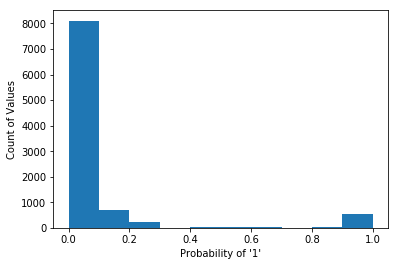

In [24]:
threshold = .2#assign threshold for 1

print(len(y_predict_test[:,1][y_predict_test[:,1]>threshold])/len(y_predict_test))

plt.hist(y_predict_test[:,1])
plt.xlabel("Probability of '1'")
plt.ylabel("Count of Values")
plt.show()



In [25]:
new_df_target = [lambda x:1 if x >threshold else 0]
new_target = pd.DataFrame(y_predict_test[:,1]).apply(new_df_target)
print(new_target.iloc[:,0].value_counts())


0    8945
1     738
Name: (0, <lambda>), dtype: int64


In [26]:
type(y_test.values)

numpy.ndarray

In [27]:
auc_test = metrics.roc_auc_score(y_test, new_target.values)
print("Baseline AUC Score: ",auc_test)
print(metricsscores(y_test,new_target))

Baseline AUC Score:  0.9577332583336432
('recall:', 0.9236111111111112, 'prec:', 0.9010840108401084, 'F1:', 0.9122085048010974)


In [28]:
knn=neighbors.KNeighborsClassifier()
knn.fit(x_train,y_train)
y_predict_test_knn = knn.predict_proba(x_test)

new_df_target = [lambda x:1 if x >.3 else 0]
new_target_knn = pd.DataFrame(y_predict_test_knn[:,1]).apply(new_df_target)
print(new_target_knn.iloc[:,0].value_counts())

auc_score=metrics.roc_auc_score(y_test,new_target_knn.values)
print(auc_score)
metricsscores(y_test,new_target_knn.values)

0    8836
1     847
Name: (0, <lambda>), dtype: int64
0.9073891740116776


('recall:',
 0.8416666666666667,
 'prec:',
 0.7154663518299882,
 'F1:',
 0.7734524569240587)

# Hyperparameter Tuning

In [29]:
# params = {'n_neighbors':[5,6,7,8,9,11,13],
#           'leaf_size':[1,2,3,5],
#           'weights':['uniform', 'distance'],
#           'algorithm':['auto', 'ball_tree','kd_tree','brute'],
#           'n_jobs':[-1]}

# knn_cv = GridSearchCV(knn,param_grid=params,cv=5)
# knn_cv.fit(x_train,y_train)
# print(knn_cv.best_params_)
# print(knn_cv.best_score_)

In [30]:
# params = {'criterion':['gini','entropy'],
#           'n_estimators':[10,20,30],
#           'min_samples_leaf':[1,3],
#           'min_samples_split':[3,5,7], 
#           'random_state':[123],
#           'n_jobs':[-1]}

# rfc_cv = GridSearchCV(rfc, param_grid=params, n_jobs=-1)

# #learning
# rfc_cv.fit(x_train,y_train)
# #The best hyper parameters set
# print("Best Hyper Parameters:\n",rfc_cv.best_params_)
# #Prediction
# prediction=rfc_cv.predict(x_test)
# #importing the metrics module
# from sklearn import metrics
# #evaluation(Accuracy)
# print("Accuracy:",metrics.accuracy_score(prediction,y_test))
# #evaluation(Confusion Metrix)
# print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

In [31]:
#kNN with Hyperparameter results

# knn=neighbors.KNeighborsClassifier(algorithm='auto',leaf_size=1,n_jobs=-1,n_neighbors=8,weights='uniform')
# knn.fit(x_train,y_train)
# y_predict_test_knn = knn.predict_proba(x_test)

# new_df_target = [lambda x:1 if x >.3 else 0]
# new_target_knn = pd.DataFrame(y_predict_test_knn[:,1]).apply(new_df_target)
# print(new_target_knn.iloc[:,0].value_counts())

# auc_score=metrics.roc_auc_score(y_test,new_target_knn.values)
# print(auc_score)
# metricsscores(y_test,new_target_knn.values)

In [32]:
# Retest Random Forest with HyperParameter results
# rfc = RandomForestClassifier(criterion='gini',min_samples_leaf=3,min_samples_split=7,n_estimators=20,n_jobs=-1,random_state=123)

# #Fit classifier to Train data set
# rfc.fit(x_train,y_train)

# #Predict Proba
# y_predict_test = rfc.predict_proba(x_test)

# new_df_target = [lambda x:1 if x >.1 else 0]
# new_target = pd.DataFrame(y_predict_test[:,1]).apply(new_df_target)
# print(new_target.iloc[:,0].value_counts())

# auc_test = metrics.roc_auc_score(y_test, new_target.values)
# print("Hypterparamter AUC Score: ",auc_test)
# print(metricsscores(y_test,new_target))

In [33]:
#Use for feature elimination
# clf = LassoCV()
# model = SelectFromModel(clf,threshold=.00000000001)
# model.fit(df_test,y)

# passed_feature_test = df_test.columns[model.get_support()].tolist()
# len(passed_feature_test)

# passed_feature_test.append('TARGET')
# passed_feature_test.append('AMT_INCOME_TOTAL')

# df_feateliminated = df_ind[passed_feature_test]
# len(passed_feature_test)

# Save Dataset for EDA

In [34]:
train_df.to_pickle('df_pickle.pkl')